In [44]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio

# Initial parameters
x0 = 1  # Initial position
v0 = 0  # Initial velocity
K = 1   # Spring constant
M = 1   # Mass


In [4]:
# Exact solution for comparison
def exact_solution(NPTS):
    t = np.linspace(0, 10, NPTS + 1)
    exact_x = x0 * np.cos(np.sqrt(K / M) * t)
    return exact_x, t

# Step 1: Euler's method
def euler_method(NPTS):
    x = np.zeros(NPTS + 1)
    v = np.zeros(NPTS + 1)
    a = np.zeros(NPTS + 1)

    t = np.linspace(0, 10, NPTS + 1)
    dt = t[1] - t[0]

    x[0] = x0
    v[0] = v0
    a[0] = -(K / M) * x[0]

    for i in range(NPTS):
        x[i + 1] = x[i] + v[i] * dt
        a[i + 1] = -(K / M) * x[i + 1]
        v[i + 1] = v[i] + a[i] * dt

    return x, t
    
# Step 2: Calculate errors
def calculate_error(approx, exact):
    return np.abs((approx - exact) / exact[-1]) * 100

In [13]:
# Step 3: Euler-Cromer's method
def euler_cromer_method(NPTS):
    x = np.zeros(NPTS + 1)
    v = np.zeros(NPTS + 1)
    a = np.zeros(NPTS + 1)

    t = np.linspace(0, 10, NPTS + 1)
    dt = t[1] - t[0]

    x[0] = x0
    v[0] = v0
    a[0] = -(K / M) * x[0]

    for i in range(NPTS):
        v[i + 1] = v[i] + a[i] * dt
        x[i + 1] = x[i] + v[i + 1] * dt
        a[i + 1] = -(K / M) * x[i + 1]

    return x, t

In [ ]:
#Euler-Cromer's method

def euler_cromer_method():
    x = np.zeros(NPTS + 1)
    v = np.zeros(NPTS + 1)
    a = np.zeros(NPTS + 1)

    x[0] = x0
    v[0] = v0
    a[0] = -(K / M) * x[0]

    for i in range(NPTS):
        v[i + 1] = v[i] + a[i] * dt
        x[i + 1] = x[i] + v[i + 1] * dt
        a[i + 1] = -(K / M) * x[i + 1]

    return x, v


In [25]:
NPTS = 400
    # Exact solution
exact_x, t = exact_solution(NPTS)

    # Euler Method
x_euler, t = euler_method(NPTS)

    # Euler-Cromer Method
x_cromer, t = euler_cromer_method(NPTS)

    # Compare Euler and Euler-Cromer
euler_error = calculate_error(x_euler[-1], exact_x)
cromer_error = calculate_error(x_cromer[-1], exact_x)
print(f"Euler's Method Error: {euler_error[-1]:.6f}%")
print(f"Euler-Cromer's Method Error: {cromer_error[-1]:.6f}%")

Euler's Method Error: 13.463172%
Euler-Cromer's Method Error: 0.827729%


In [28]:
NPTS = 40000
    # Exact solution
exact_x, t = exact_solution(NPTS)

    # Euler Method
x_euler, t = euler_method(NPTS)

    # Euler-Cromer Method
x_cromer, t = euler_cromer_method(NPTS)

    # Compare Euler and Euler-Cromer
euler_error = calculate_error(x_euler[-1], exact_x)
cromer_error = calculate_error(x_cromer[-1], exact_x)
print(f"Euler's Method Error: {euler_error[-1]:.6f}%")
print(f"Euler-Cromer's Method Error: {cromer_error[-1]:.6f}%")


Euler's Method Error: 0.125092%
Euler-Cromer's Method Error: 0.008106%


In [40]:
def leapfrog_method(NPTS):
    x = np.zeros(NPTS + 1)
    v = np.zeros(NPTS + 1)
    a = np.zeros(NPTS + 1)

    t = np.linspace(0, 10, NPTS + 1)
    dt = t[1] - t[0]

    x[0] = x0
    v[0] = v0
    a[0] = -(K / M) * x[0]

    for i in range(NPTS):
        x[i + 1] = x[i] + v[i] * dt + 0.5 * a[i] * dt ** 2
        a[i + 1] = -(K / M) * x[i + 1]
        v[i + 1] = v[i] + 0.5 * (a[i] + a[i + 1]) * dt
        #v[i + 1] = v[i] + a[i + 1] * dt 
    return x, t

In [37]:
NPTS = 5300
    # Exact solution
exact_x, t = exact_solution(NPTS)

    # Euler Method
x_leapfrog, t = leapfrog_method(NPTS)

    # Compare Euler and Euler-Cromer
leapfrog_error = calculate_error(x_leapfrog[-1], exact_x)
print(f"Euler-Cromer's Method Error: {leapfrog_error[-1]:.6f}%")


Euler-Cromer's Method Error: 0.440459%


Running for NPTS = 53


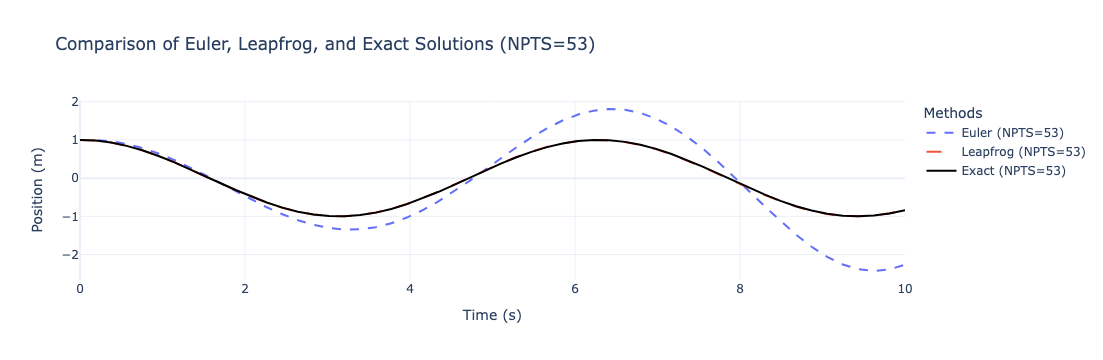

Static plot saved as comparison_NPTS_53.png
Running for NPTS = 530


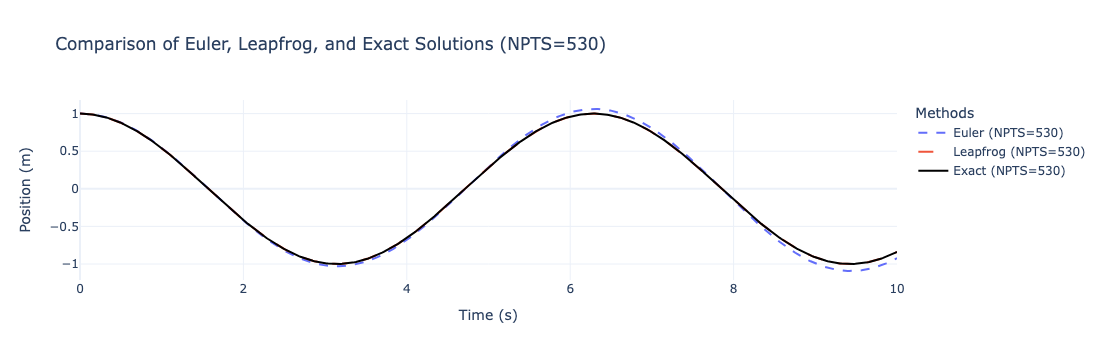

Static plot saved as comparison_NPTS_530.png
Running for NPTS = 5030


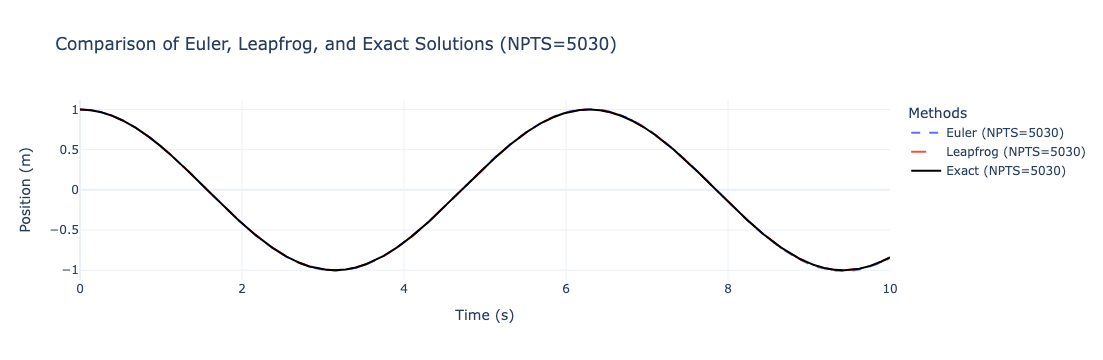

Static plot saved as comparison_NPTS_5030.png


In [45]:
def run_and_plot_timestep():
    for NPTS in [53, 530, 5030]:  # Different timestep resolutions
        print(f"Running for NPTS = {NPTS}")

        # Exact solution
        exact_x, t = exact_solution(NPTS)

        # Euler Method
        x_euler, t = euler_method(NPTS)

        # Leapfrog Method
        x_leapfrog, t = leapfrog_method(NPTS)

        # Interactive Plot using Plotly
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=t, y=x_euler, mode='lines', name=f'Euler (NPTS={NPTS})', line=dict(dash='dash')))
        fig.add_trace(go.Scatter(x=t, y=x_leapfrog, mode='lines', name=f'Leapfrog (NPTS={NPTS})', line=dict(dash='longdash')))
        fig.add_trace(go.Scatter(x=t, y=exact_x, mode='lines', name=f'Exact (NPTS={NPTS})', line=dict(color='black')))
        fig.update_layout(
            title=f"Comparison of Euler, Leapfrog, and Exact Solutions (NPTS={NPTS})",
            xaxis_title="Time (s)",
            yaxis_title="Position (m)",
            legend_title="Methods",
            template="plotly_white"
        )
        fig.show()
        
        # Save static version as PNG
        filename = f"comparison_NPTS_{NPTS}.png"
        pio.write_image(fig, filename, format='png')
        print(f"Static plot saved as {filename}")
        
run_and_plot_timestep()
